In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import gridspec
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from tqdm.notebook import tqdm

In [13]:
X, Y = make_classification(
    n_samples=150,
    n_features=2,
    n_informative=2,
    n_classes=3,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=0,
)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=50, random_state=0)

In [3]:
model = KNeighborsClassifier(n_neighbors=1)
_ = model.fit(X_train, Y_train)

<Axes: >

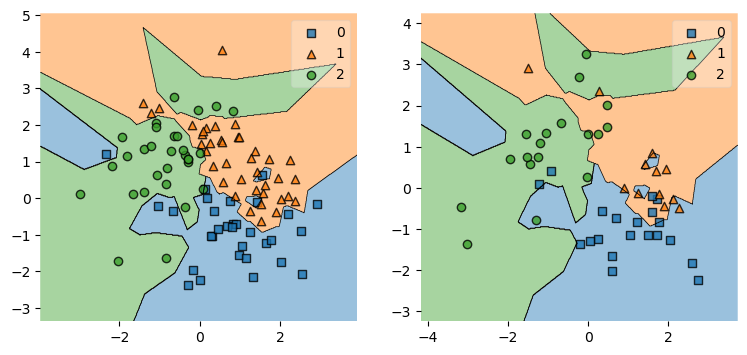

In [4]:
fig, gs = plt.figure(figsize=(9, 4)), gridspec.GridSpec(1, 2)

ax = []
for i in range(2):
    ax.append(fig.add_subplot(gs[i]))

plot_decision_regions(X_train, Y_train, model, ax=ax[0])
plot_decision_regions(X_test, Y_test, model, ax=ax[1])

In [5]:
models = []
for i in range(1, 50):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, Y_train)
    models.append(model)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

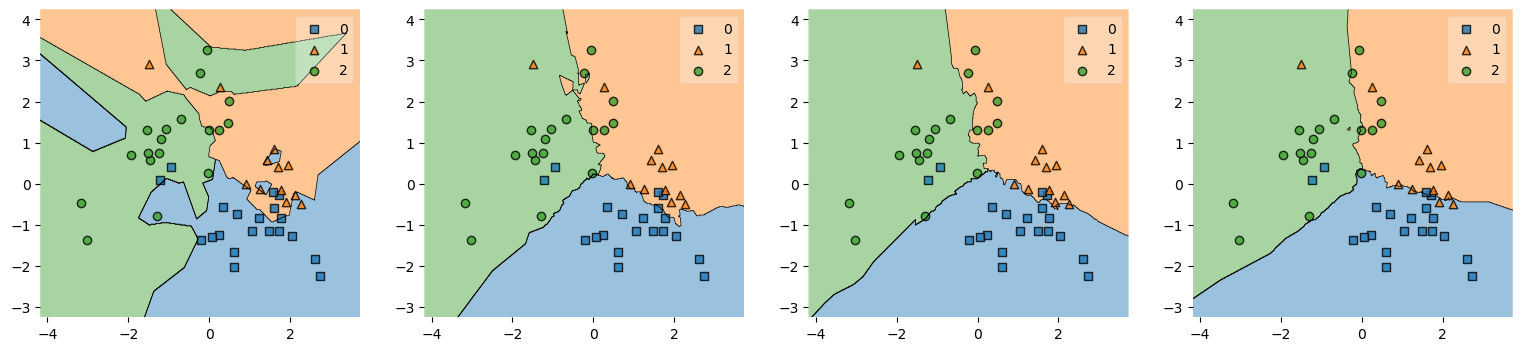

In [8]:
fig, gs = plt.figure(figsize=(19, 4)), gridspec.GridSpec(1, 4)

ax = []
for i in tqdm(range(4)):
    ax.append(fig.add_subplot(gs[i]))
for i in tqdm(range(4)):
    plot_decision_regions(X_test, Y_test, models[12 * i], ax=ax[i])

In [14]:
def func(distance):
    ret = np.ones_like(distance)
    k = ret.shape[1]
    for i in range(k):
        ret[:, i] *= (k - i) / k
    return ret

In [9]:
models = []
for i in range(1, 51):
    model = KNeighborsClassifier(n_neighbors=i, weights=func)
    model.fit(X_train, Y_train)
    models.append(model)